![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

Grecia Pacheco Castellanos
A01366730

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [124]:
my_folder = "/content/drive/MyDrive/SemestreTec/COLAB-SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SemestreTec/COLAB-SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [125]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [126]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [127]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [128]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [129]:
%%writefile .authinfo
oda user A01366730@tec.mx password Ohlnz1D*knesn

Overwriting .authinfo


Copy this file to home

In [130]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [131]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/SemestreTec/COLAB-SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1184



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/SemestreTec/COLAB-SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work19CC00013DAF_odaws04-usw2.oda.sas.com/SAS_work383500013DAF_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 81327


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [132]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Sunday, December  4, 2022 02:17:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Sunday, December  4, 2022 02:17:00 PM

33         


For local Jupyter

In [133]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [134]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

In [135]:
data1.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [136]:
data2.head()

,ID,GaveThisYear,AmtThisYear
0,2000001.0,0.0,0.0
1,2000002.0,0.0,0.0
2,2000003.0,0.0,0.0
3,2000004.0,0.0,0.0
4,2000005.0,0.0,0.0


## Merge the Data

In [137]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Understanding the data

This part is neccesary to understand the problem and the variables provided in order to realice the correct data transformation for a better model training.


In [138]:
to_delete = ["ID", "LastName", "FirstName"]
data_merge = data_merge.drop(columns=to_delete)
data_merge.head()

,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


Statistical measures

In [139]:
data_merge.describe()

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [140]:
NUMERICS = ('int16', 'int32', 'int64', 'float16', 'float32', 'float64')

data_merge.select_dtypes(include = NUMERICS).describe().T

,count,mean,std,min,25%,50%,75%,max
Woman,1000000.0,0.516936,0.499713,0.0,0.0,1.0,1.0,1.0
Age,1000000.0,46.366170,18.945324,16.0,30.0,46.0,61.0,90.0
Salary,1000000.0,65531.654000,61051.122343,0.0,20700.0,44000.0,91200.0,250000.0
SeniorList,1000000.0,4.582967,3.325844,0.0,2.0,4.0,7.0,10.0
NbActivities,1000000.0,0.561413,0.996803,0.0,0.0,0.0,1.0,10.0
Referrals,1000000.0,0.560556,1.054027,0.0,0.0,0.0,1.0,16.0
Recency,336334.0,3.039636,2.120722,1.0,1.0,2.0,4.0,10.0
Frequency,336334.0,1.666882,1.052090,1.0,1.0,1.0,2.0,10.0
Seniority,336334.0,4.474148,2.588119,1.0,2.0,4.0,6.0,10.0
TotalGift,336334.0,104.454055,303.760477,10.0,20.0,40.0,90.0,15150.0


**Heatmap of the correlation matrix**

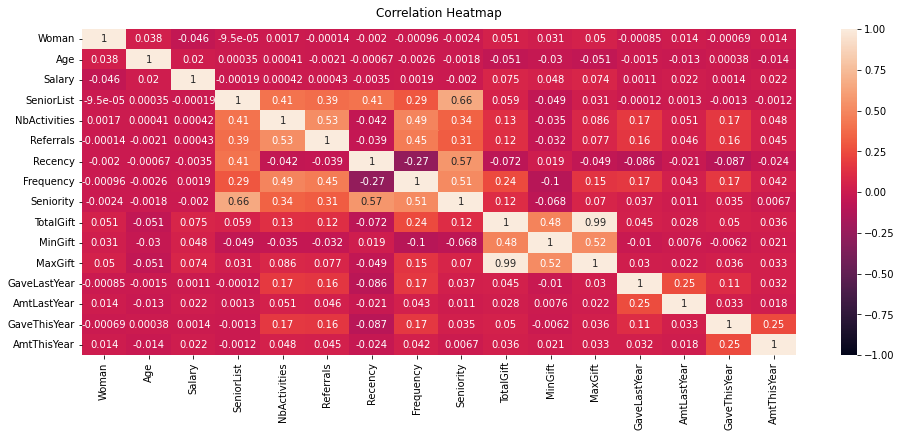

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_merge.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

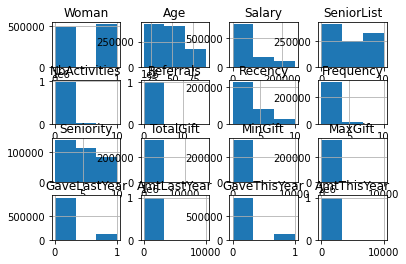

In [142]:
hists = data_merge.hist(bins=3)

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [143]:
#Libraries
import math


In [144]:
# In this case, we are replacing MinGift by 0.
#For the MaxGift we are using the median of the value

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=data_merge['MaxGift'].median())

data_merge.sample(3)

,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
153452,0.0,28.0,21400.0,High School,Suburban,4.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,30.0,0.0,0.0,0.0,0.0
279841,0.0,43.0,74900.0,University / College,Suburban,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,30.0,0.0,0.0,0.0,0.0
911121,0.0,24.0,155400.0,University / College,Rural,9.0,1.0,0.0,2.0,2.0,6.0,50.0,10.0,40.0,0.0,0.0,0.0,0.0


Filling City

In [145]:
data_merge[['City']].describe()

,City
count,1000000
unique,4
top,City
freq,332657


In [146]:
# For categorical data we are filling with the mode 

data_merge[['City']]= data_merge[['City']].fillna(value="City")  
data_merge[['Education']] = data_merge[['Education']].fillna(value="University / College")  


Filling recency

In [147]:
# For non specific numerical data we are filling with  the mean
data_merge[['Recency']] = data_merge[['Recency']].fillna(math.floor(data_merge['Recency'].mean()))  


Filing Frequency

In [148]:
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(math.floor(data_merge['Frequency'].mean()))  


Filling Seniority

In [149]:
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(math.floor(data_merge['Seniority'].mean()))  


## Transforming data

For a better analysis we need to transform the categorical data.

In [150]:
data_merge= pd.get_dummies(data_merge, columns= ['Education'])

In [151]:
data_merge= pd.get_dummies(data_merge, columns= ['City'])

In [152]:
data_merge.head()

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
0,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,...,0.0,0.0,0.0,0,0,1,1,0,0,0
1,1.0,38.0,15800.0,4.0,1.0,1.0,3.0,1.0,4.0,NaN,...,0.0,0.0,0.0,0,1,0,0,0,1,0
2,1.0,37.0,57400.0,5.0,0.0,0.0,3.0,1.0,4.0,NaN,...,0.0,0.0,0.0,0,0,1,0,0,1,0
3,1.0,78.0,23700.0,3.0,0.0,0.0,3.0,1.0,4.0,NaN,...,0.0,0.0,0.0,0,1,0,0,0,1,0
4,1.0,34.0,71900.0,8.0,0.0,0.0,3.0,1.0,4.0,NaN,...,0.0,0.0,0.0,0,0,1,0,0,1,0


## Normalization

In [153]:
from sklearn import preprocessing

x_scale = preprocessing.scale(data_merge)

In [154]:
df = pd.DataFrame(x_scale, columns = data_merge.columns)

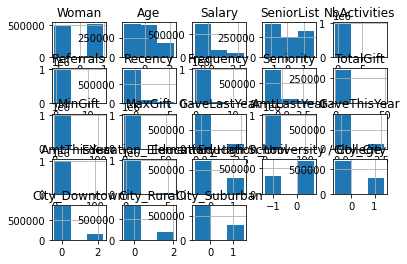

In [155]:
hists = df.hist(bins=3)

## Duplicates and outliers

In [156]:
#Removing duplicates
data_merge= data_merge.drop_duplicates()
data_merge.shape

(987931, 23)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


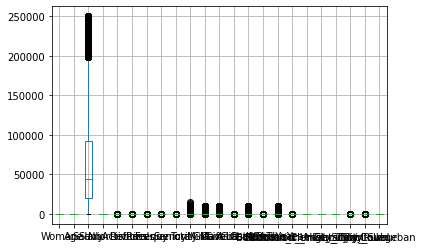

In [157]:
data_merge.boxplot()

In [158]:
#Function to identify and remove outliers
def outliers(col):
  global data_merge
  percentile25 = data_merge[col].quantile(0.25)
  percentile75 = data_merge[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  data_merge[data_merge[col] > upper_limit]
  data_merge[data_merge[col] < lower_limit]
  data_merge = data_merge[data_merge[col] < upper_limit]
  

In [159]:
col_names= ['Salary']
for i in col_names:
  outliers(i)
data_merge.shape

(931119, 23)

## Data Partition

We needd to divide the data set into the training and validation sets so we can corroborate with the provided data de accuracy of our models.

In [160]:

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.2, random_state=1) 

#train.head()
train.sample(2)

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,...,AmtLastYear,GaveThisYear,AmtThisYear,Education_Elementary,Education_High School,Education_University / College,City_City,City_Downtown,City_Rural,City_Suburban
640448,1.0,85.0,18400.0,3.0,0.0,0.0,3.0,1.0,4.0,NaN,...,0.0,0.0,0.0,0,1,0,1,0,0,0
13174,0.0,47.0,31400.0,4.0,0.0,0.0,3.0,1.0,4.0,NaN,...,0.0,0.0,0.0,0,1,0,0,1,0,0


## Prebuilt Models
***





In [161]:
#Importing the neccesary models to test
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


In [162]:
X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'City_City', 'City_Downtown', 
                 'City_Rural', 'City_Suburban' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'City_City', 'City_Downtown', 
                 'City_Rural', 'City_Suburban']] 
Y_valid = validation['AmtThisYear']

## Model training and optimization

### Linear Regression Model

In [163]:
regr = LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [164]:
import numpy as np
from sklearn import metrics
#MAE
print("MAE: " + str(metrics.mean_absolute_error(Y_valid,regr_predict)))
#MSE
print("MSE: " + str(metrics.mean_squared_error(Y_valid,regr_predict)))
#RMSE
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict))))

MAE: 12.846763545078742
MSE: 5607.725921976679
RMSE: 74.88475093085827


### Regression Tree Model

In [165]:
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [166]:
#you can change the criteria
#MAE
print("MAE: " + str(metrics.mean_absolute_error(Y_valid,DT_predict)))
#MSE
print("MSE: " + str(metrics.mean_squared_error(Y_valid,DT_predict)))
#RMSE
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict))))

MAE: 12.9024639503555
MSE: 5750.369782775883
RMSE: 75.83119267673352


#### Optimizer

In [167]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["log2","sqrt"],
           "max_leaf_nodes":[10,20,30,40,50,60] 
}

In [168]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(DT_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [169]:
#tuning_model.fit(X_train, Y_train)
#tuning_model.best_params_

In [170]:
DT_model2 = DecisionTreeRegressor(max_depth=3, max_features= 'sqrt',max_leaf_nodes= 60,min_samples_leaf= 2,min_weight_fraction_leaf= 0.1,splitter='best').fit(X_train,Y_train)
DT_predict2 = DT_model2.predict(X_valid) #Predictions on Testing data

In [171]:
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict2))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict2))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict2)))

13.160624922189553
5621.099739712482
74.97399375591834


### XGBoost Regressor

In [172]:

XGB_model = XGBRegressor(booster = "gblinear", learning_rate= 0.07 ,max_depth = 7, subsample= 0.6)
XGB_model.fit(X_train,Y_train)
XGB_model.score(X_train,Y_train)
XGB_predict=XGB_model.predict(X_valid)



[14:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [173]:
import numpy as np
from sklearn import metrics
#you can change the criteria
#MAE
print("MAE: " + str(metrics.mean_absolute_error(Y_valid,XGB_predict)))
#MSE
print("MSE: " + str(metrics.mean_squared_error(Y_valid,XGB_predict)))
#RMSE
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(Y_valid,XGB_predict))))

MAE: 12.889402054034514
MSE: 5616.864929601964
RMSE: 74.94574657445187


### LGBM Regressor

In [174]:
LGBM_model = LGBMRegressor()

LGBM_model.fit(X_train,Y_train)
LGBM_model.score(X_train,Y_train)
LGBM_predict=LGBM_model.predict(X_valid)


In [175]:
#MAE
print("MAE: " + str(metrics.mean_absolute_error(Y_valid,LGBM_predict)))
#MSE
print("MSE: " + str(metrics.mean_squared_error(Y_valid,LGBM_predict)))
#RMSE
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(Y_valid,LGBM_predict))))

MAE: 12.891889969712784
MSE: 5620.6002789576905
RMSE: 74.97066278857145


## Scoring New Data

### Prepare data for scoring

In [176]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [177]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")



scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 
scoring_data[['City']] = scoring_data[['City']].fillna(value="City")  
scoring_data= pd.get_dummies(scoring_data, columns= ['City'])

scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,SeniorList,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,City_City,City_Downtown,City_Rural,City_Suburban
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,2.0,...,1.0,2.0,2.0,1010.0,10.0,1000.0,1,0,0,0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,4.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0,0,1,0
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,5.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0,0,1,0
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,High School,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0,0,1,0
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,8.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0,0,1,0


In [178]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the other models, even when the optimization of the DT model were performed

X = scoring_data[['Age', 'Salary','MinGift', 'AmtLastYear','GaveLastYear','Woman', 'NbActivities','City_City', 'City_Downtown', 
                 'City_Rural', 'City_Suburban' ]]  

regr_predict_end=regr.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## Exporting Results to a CSV File

In [179]:
Result= scoring_data[['ID','Prediction']]
Result.to_csv('test_Round1_Output.csv', index=False)

In [180]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 90000
submission = Result.head(NB)
submission.to_csv('test2_Round1_Output.csv', index=False)

In [181]:
!head Round1\ Output.csv

head: cannot open 'Round1 Output.csv' for reading: No such file or directory
